In [67]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
df = pd.read_csv("listings.csv.gz")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3850 non-null   int64  
 1   listing_url                                   3850 non-null   object 
 2   scrape_id                                     3850 non-null   int64  
 3   last_scraped                                  3850 non-null   object 
 4   name                                          3850 non-null   object 
 5   description                                   3818 non-null   object 
 6   neighborhood_overview                         2851 non-null   object 
 7   picture_url                                   3850 non-null   object 
 8   host_id                                       3850 non-null   int64  
 9   host_url                                      3850 non-null   o

In [52]:
# why is number of bathrooms entered as a string?
df["bathrooms_text"].unique() # answer: to include description of shared vs. not shared

# neighbourhood vs neighbourhood_cleansed?
df["neighbourhood"].unique()
df["neighbourhood_cleansed"].unique()
# neighbourhood has inconsistent capitalization and abbreviation; Denver metro cities; < 3000 non-null
# cleansed is more granular

# removing neighbourhood for now - 26

array(['Virginia Village', 'Highland', 'Five Points', 'North Park Hill',
       'North Capitol Hill', 'Baker', 'West Highland', 'Capitol Hill',
       'South Park Hill', 'CBD', 'Washington Park', 'Union Station',
       'Washington Park West', 'City Park West', 'Clayton', 'City Park',
       'Stapleton', 'Platt Park', 'Lowry Field', 'Sunnyside',
       'Congress Park', 'Goldsmith', 'Berkeley', 'Lincoln Park', 'Cole',
       'Cheesman Park', 'West Colfax', 'Speer', 'Sloan Lake',
       'University', 'Hilltop', 'Country Club', 'Cory - Merrill',
       'Athmar Park', 'Windsor', 'Gateway - Green Valley Ranch',
       'Indian Creek', 'Rosedale', 'Whittier', 'Fort Logan', 'Skyland',
       'Hale', 'Cherry Creek', 'Washington Virginia Vale', 'Bear Valley',
       'Harvey Park', 'Hampden South', 'Civic Center', 'Jefferson Park',
       'Montclair', 'Harvey Park South', 'Regis', 'University Park',
       'Wellshire', 'Hampden', 'Overland', 'Barnum West', 'Barnum',
       'University Hills', 'No

In [58]:
# convert price to numerical
df["price"] = df["price"].str.replace("$","").str.replace(",","").astype(float)

array([  99.,  135.,  179.,   54.,   52.,   33.,   85.,  110.,   90.,
         67.,  400.,   45.,   78.,  165.,   81.,  223.,   55.,  156.,
        130.,   50.,  200.,  143.,  155.,  195.,  123.,  307.,   56.,
         82.,  180.,  214.,   74.,  105.,  116.,   96.,  129.,  125.,
        145.,  100.,  174.,  120.,  136.,   68.,   58.,   53.,   47.,
         98.,  218.,  161.,   59.,  245.,  102.,   76.,  127.,  108.,
         88.,   60.,  199.,  251.,   35.,   34.,  359.,   39.,  150.,
         73.,  235.,   92.,   26.,  260.,  189.,  115.,   70.,   48.,
        300.,  162.,  250.,  159.,   79.,   75.,  106.,  493.,  301.,
         49.,  613.,  190., 1000.,  299.,  207.,   93.,  317.,  170.,
         77.,  114.,  139.,  281.,   80.,   63.,  850.,   40.,   69.,
        146.,  557.,  275.,  175.,  104.,  229.,   65.,  600.,  230.,
        280.,  122.,  295.,  149.,  396.,   91.,   95.,  395.,   62.,
        132.,  133.,  725.,  153.,   29.,  140.,  228.,  157.,  226.,
         41.,  339.,

In [60]:
# drop the all-null columns: neighbourhood_group_cleansed, bathrooms, calendar_updated
# drop listing_url
# drop scraping info: scrape_id, last_scraped, calendar_last_scraped
# drop repetitive or irrelevant info about host: host_location, host_about, 
#### host_neighbourhood, host_total_listings_count, host_listings_count, host_total_listings_count, 69-72
# drop repetitive columns: neighbourhood, number_of_reviews_ltm, number_of_reviews_l30d, 49-54
# drop info about current/future availability: 49-53
# drop miscellaneous irrelevant: license, first_review, last_review

# a:b is not inclusive of b

df1 = df.drop(df.columns[[np.r_[1:4, 9, 12 ,13, 20:23, 26, 28, 34, 42:55, 58,59, 67:73]]], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3850 non-null   int64  
 1   name                         3850 non-null   object 
 2   description                  3818 non-null   object 
 3   neighborhood_overview        2851 non-null   object 
 4   picture_url                  3850 non-null   object 
 5   host_id                      3850 non-null   int64  
 6   host_name                    3850 non-null   object 
 7   host_since                   3850 non-null   object 
 8   host_response_time           3170 non-null   object 
 9   host_response_rate           3170 non-null   object 
 10  host_acceptance_rate         3322 non-null   object 
 11  host_is_superhost            3850 non-null   object 
 12  host_thumbnail_url           3850 non-null   object 
 13  host_picture_url  

(array([1068.,  803.,  604.,  413.,  301.,  213.,  149.,  160.,   80.,
          59.]),
 array([  0. ,  49.5,  99. , 148.5, 198. , 247.5, 297. , 346.5, 396. ,
        445.5, 495. ]),
 <BarContainer object of 10 artists>)

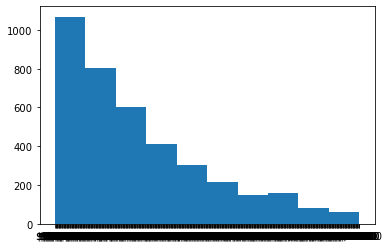

In [59]:
# distribution of prices
plt.hist(df1["price"])

In [68]:
# correlations between columns
df1.corr()
# problem with independence of listings - neighborhood association, belonging to same host...

,id,host_id,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,1.000000,0.446211,-0.018163,0.005426,0.005753,-0.012894,-0.007520,0.043863,-0.016157,-0.046862,...,-0.150624,-0.039079,-0.077820,-0.101772,-0.067386,-0.085645,-0.103459,-0.065980,-0.147628,0.020674
host_id,0.446211,1.000000,-0.010619,0.089977,0.000115,-0.040320,0.013568,0.032312,0.032048,-0.060586,...,-0.076923,-0.055720,-0.152301,-0.162388,-0.130676,-0.149037,-0.168563,-0.107922,-0.187999,0.002416
latitude,-0.018163,-0.010619,1.000000,0.057451,0.065465,0.024616,0.043221,0.036128,-0.035095,0.031457,...,0.074508,0.065680,0.041706,0.041120,0.061610,0.028672,0.024420,0.028858,0.022872,0.035185
longitude,0.005426,0.089977,0.057451,1.000000,-0.036519,-0.010870,-0.020612,-0.079208,0.093337,0.020323,...,-0.027927,-0.055676,-0.064871,-0.044174,-0.032955,-0.078631,-0.045679,-0.054067,-0.011913,-0.006839
accommodates,0.005753,0.000115,0.065465,-0.036519,1.000000,0.826060,0.726589,0.457138,-0.110478,-0.007031,...,0.027811,-0.017606,0.044611,0.019937,0.005193,0.035001,0.014753,-0.020763,0.015437,0.039123
bedrooms,-0.012894,-0.040320,0.024616,-0.010870,0.826060,1.000000,0.747482,0.481852,-0.069747,0.022108,...,-0.064457,-0.080513,0.037610,0.016694,-0.003686,0.031324,0.007298,-0.014629,0.011528,-0.005635
beds,-0.007520,0.013568,0.043221,-0.020612,0.726589,0.747482,1.000000,0.498768,-0.076227,0.008792,...,0.013393,-0.012725,0.021452,0.002360,-0.010409,0.016733,-0.000167,-0.017135,-0.001233,0.030823
price,0.043863,0.032312,0.036128,-0.079208,0.457138,0.481852,0.498768,1.000000,-0.030870,0.016410,...,-0.049374,-0.060761,0.064231,0.038846,0.017434,0.025982,0.015344,0.024292,0.002499,-0.014645
minimum_nights,-0.016157,0.032048,-0.035095,0.093337,-0.110478,-0.069747,-0.076227,-0.030870,1.000000,0.176837,...,-0.313918,-0.333947,-0.042836,-0.042510,-0.031902,-0.042472,-0.028848,-0.006986,-0.040951,-0.142727
maximum_nights,-0.046862,-0.060586,0.031457,0.020323,-0.007031,0.022108,0.008792,0.016410,0.176837,1.000000,...,-0.117154,-0.136316,-0.044197,-0.026377,-0.043860,-0.020217,-0.035552,-0.022608,-0.049930,-0.064151


In [66]:
# list of predictors, excluding columns we would use to link reviews/images with etc etc
predictors = df1[df1.columns[[np.r_[24,25, 28:41]]]]


print("Correlation between price and each candidate predictor\n\n")
for col in predictors.columns:
    print("{}: {}\n".format(col, df1["price"].corr(predictors[col])))

Correlation between price and each candidate predictor


bedrooms: 0.4818520823150778

beds: 0.49876833036243534

minimum_nights: -0.030870346902591918

maximum_nights: 0.016410289224757627

number_of_reviews: -0.08285084446932561

number_of_reviews_ltm: -0.049373572441409906

number_of_reviews_l30d: -0.06076059200619093

review_scores_rating: 0.06423112175083363

review_scores_accuracy: 0.03884617182900326

review_scores_cleanliness: 0.017433571601293205

review_scores_checkin: 0.025981881582482543

review_scores_communication: 0.01534442521522819

review_scores_location: 0.02429153505275281

review_scores_value: 0.0024994101584497924

reviews_per_month: -0.01464470709708472



In [69]:
# test for degree of multicollinearity
# for i in len(predictors.columns):
#     vif = variance_inflation_factor(predictors.values, i)
#     print("Variable: {}   |   VIF: {}\n".format(predictor))

SyntaxError: unexpected EOF while parsing (<ipython-input-69-be6ff88b6016>, line 2)